# Installing Dependencies

In [1]:
pip install pandas numpy torch openai transformers faker

Note: you may need to restart the kernel to use updated packages.


# Preparing Data

In [96]:
import pandas as pd
import random
import uuid
from faker import Faker

fake = Faker()

# Number of records per table
num_customers = 1000
num_organizations = 200
num_transactions = 3000
num_sentiments = 2000

# ------------------- Customer Profiles -------------------
customers = []
for i in range(num_customers):
    customers.append({
        "customer_id": str('CUSTID_'+str(i)),
        "name": fake.name(),
        "age": random.randint(18, 65),
        "gender": random.choice(["Male", "Female"]),
        "education": random.choice(["High School", "Bachelor's", "Master's", "PhD"]),
        "occupation": fake.job(),
        "income": random.randint(30000, 150000),
        "interests": random.choice(["Technology","Entertainment", "Finance", "Sports", "Music", "Fashion","Beauty", "Gaming","Home-Decor","Books, Science"]),
        "preferences": random.choice(["Budget", "Luxury", "Eco-Friendly","Tech-Savvy, AI", "Fashion", "Beauty"])
    })

df_customers = pd.DataFrame(customers)
df_customers.to_csv("customer_profiles.csv", index=False)

# ------------------- Organization Information -------------------
organizations = []
for i in range(num_organizations):
    organizations.append({
        "organization_id": str('ORGID_'+str(i)),
        "company_name": fake.company(),
        "industry": random.choice(["Electronics","Entertainment", "Finance", "Fashion", "Software","Retail", "Technology", "Automotive", "Healthcare"]),
        "price_range": random.choice(["Low", "Medium", "High", "Premium"]),
        "flagship_product": fake.word(),
        "revenue": random.randint(1_000_000, 5_000_000),
        "num_employees": random.randint(50, 5000)
    })

df_organizations = pd.DataFrame(organizations)
df_organizations.to_csv("organization_info.csv", index=False)

# ------------------- Transaction History -------------------
transactions = []
for _ in range(num_transactions):
    transactions.append({
        "transaction_id": str(uuid.uuid4()),
        "customer_id": random.choice(df_customers["customer_id"].tolist()),  # Ensuring valid customer_id
        "item_purchased": fake.word(),
        "category": random.choice(["Electronics","Entertainment", "Finance", "Clothing", "Furniture", "Books","Fashion", "Software", "Healthcare"]),
        "organization_id": random.choice(df_organizations["organization_id"].tolist()),  # Ensuring valid organization_id
        "price": round(random.uniform(10, 1000), 2),
        "payment_mode": random.choice(["Credit Card", "Debit Card", "PayPal", "Net Banking"]),
        "purchase_date": fake.date_this_decade()
    })

df_transactions = pd.DataFrame(transactions)
df_transactions.to_csv("transaction_history.csv", index=False)

# ------------------- Social Media Sentiments -------------------
sentiments = []
for _ in range(num_sentiments):
    sentiments.append({
        "sentiment_id": str(uuid.uuid4()),
        "customer_id": random.choice(df_customers["customer_id"].tolist()),  # Ensuring valid customer_id
        "organization_id": random.choice(df_organizations["organization_id"].tolist()),  # Ensuring valid organization_id
        "sentiment_score": round(random.uniform(-1, 1), 2),  # Score between -1 (negative) and 1 (positive)
        "platform": random.choice(["Twitter", "Facebook", "Reddit"]),
        "review_text": random.choice([
        "Excellent service!", "Not satisfied.", "Great product!", "Could be better.", "Highly recommended!",
        "Poor experience.", "Loved it!", "Would buy again.", "Too expensive.", "Value for money."
    ]),
        "timestamp": fake.date_time_this_decade()
    })

df_sentiments = pd.DataFrame(sentiments)
df_sentiments.to_csv("social_media_sentiments.csv", index=False)

print("CSV files generated successfully, and Saved in the Folder in which this file is saved.")

customer_profiles = pd.read_csv("customer_profiles.csv")
organizations = pd.read_csv("organization_info.csv")
transactions = pd.read_csv("transaction_history.csv")
social_sentiment = pd.read_csv("social_media_sentiments.csv")

CSV files generated successfully, and Saved in the Folder in which this file is saved.


# Customer Profiles, Organizations, Transactions History, Social Media Sentiment tables

In [97]:

print("\nCustomer Profiles:\n")
customer_profiles.head()


Customer Profiles:



,customer_id,name,age,gender,education,occupation,income,interests,preferences
0,CUSTID_0,Meagan Andrade,35,Female,Master's,"Nurse, children's",85806,Fashion,Beauty
1,CUSTID_1,Lindsey Chase,50,Female,High School,Electronics engineer,47162,Gaming,Fashion
2,CUSTID_2,James Roberts,57,Female,Bachelor's,Analytical chemist,126874,Gaming,Luxury
3,CUSTID_3,Raven Lopez,60,Female,Master's,"Nurse, children's",138123,Music,Luxury
4,CUSTID_4,Keith Reed,27,Male,PhD,Media planner,132844,Music,Eco-Friendly


In [98]:
print("\nOrganizations:\n")
organizations.head()


Organizations:



,organization_id,company_name,industry,price_range,flagship_product,revenue,num_employees
0,ORGID_0,Schultz-Shaw,Technology,Low,forward,4501094,3925
1,ORGID_1,"Mcmahon, Sanchez and Rangel",Entertainment,Low,involve,3709327,3323
2,ORGID_2,"Miller, Koch and Miller",Software,Medium,student,2209367,2572
3,ORGID_3,Ortiz-Hines,Healthcare,Low,special,3843027,872
4,ORGID_4,Cox-Manning,Fashion,Low,kind,4303230,2883


In [99]:
print("\nTransactions History:\n")
transactions.head()


Transactions History:



,transaction_id,customer_id,item_purchased,category,organization_id,price,payment_mode,purchase_date
0,ab0081a6-b058-4674-ad96-be24d374f1ea,CUSTID_477,hope,Healthcare,ORGID_13,632.56,Net Banking,2020-09-21
1,53ac08b2-134a-4cf2-b68e-0b90d984082a,CUSTID_729,sell,Furniture,ORGID_77,994.74,Debit Card,2022-12-16
2,6c65cefb-76af-407e-9f22-989ce7b9ba44,CUSTID_636,perhaps,Finance,ORGID_32,445.53,PayPal,2020-04-19
3,a59c1f45-912c-436c-8e90-5232dc495c4e,CUSTID_934,look,Clothing,ORGID_1,64.53,Debit Card,2020-06-28
4,0bd1bcc0-28e8-44ce-affc-02177b35e00a,CUSTID_425,history,Entertainment,ORGID_175,194.60,Debit Card,2024-12-06


In [100]:
print("\nSocial Media Sentiment:\n")
social_sentiment.head()


Social Media Sentiment:



,sentiment_id,customer_id,organization_id,sentiment_score,platform,review_text,timestamp
0,96e06985-bf6e-4f21-8ee4-dece0e5d3340,CUSTID_941,ORGID_88,-0.24,Reddit,Could be better.,2022-03-10 13:00:36
1,badc4ca2-fc2f-45a2-b79e-6c721264be80,CUSTID_386,ORGID_49,0.22,Twitter,Great product!,2023-11-11 20:30:30
2,6b1a833e-0cbd-476c-b6d0-f08512ec528e,CUSTID_165,ORGID_31,-0.44,Facebook,Poor experience.,2021-10-11 05:49:26
3,e7917bc9-6146-474d-9533-384d7843ea77,CUSTID_317,ORGID_14,0.16,Facebook,Highly recommended!,2020-02-14 01:58:58
4,28e9ee28-9655-4c10-8718-24867a2a55fb,CUSTID_879,ORGID_3,-0.52,Twitter,Value for money.,2022-05-31 05:09:41


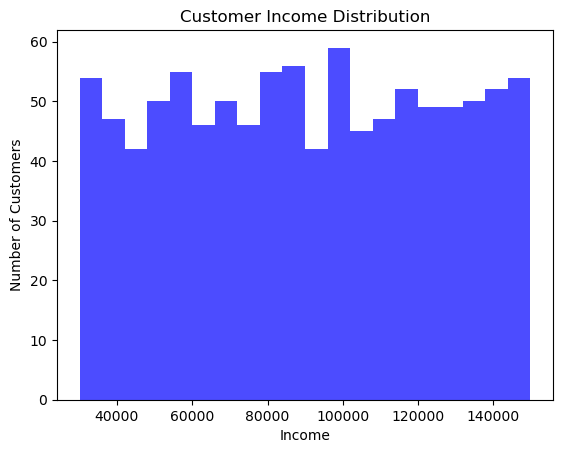

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline


# Preprocessing Example
def preprocess_text(text):
    text = text.lower()
    return text.strip()

customer_profiles['processed_interests'] = customer_profiles['interests'].apply(preprocess_text)
customer_profiles['processed_preferences'] = customer_profiles['preferences'].apply(preprocess_text)

# Visualization
plt.hist(customer_profiles['income'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.title('Customer Income Distribution')
plt.show()

# K-MEANS CLUSTERING

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
customer_data = pd.read_csv('customer_profiles.csv')
numerical_features = ['age', 'income']
categorical_features = ['preferences', 'interests', 'occupation','education']

# One-Hot Encode categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cats = encoder.fit_transform(customer_data[categorical_features])

# Convert encoded categorical data to DataFrame
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out())

# Standardize numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(customer_data[numerical_features])
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Combine transformed categorical and numerical features
final_features = pd.concat([scaled_df, encoded_df], axis=1)

In [139]:
# Feature Selection
# features = customer_data[['age', 'education','occupation','income','interests','preferences']]
features = customer_data[['age', 'income']]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features)

# Recommend products based on cluster assignment
def recommend_products(customer_id):
    cluster = customer_data[customer_data['customer_id'] == customer_id]['Cluster'].values[0]
    similar_customers = customer_data[customer_data['Cluster'] == cluster]
    return similar_customers['preferences'].value_counts().index.tolist()


#### 

In [140]:
print(recommend_products('CUSTID_163'))

['Budget', 'Tech-Savvy, AI', 'Fashion', 'Luxury', 'Beauty', 'Eco-Friendly']


In [143]:
print(recommend_products('CUSTID_132'))

['Fashion', 'Tech-Savvy, AI', 'Beauty', 'Luxury', 'Eco-Friendly', 'Budget']


In [145]:
print(recommend_products('CUSTID_193'))

['Eco-Friendly', 'Tech-Savvy, AI', 'Beauty', 'Fashion', 'Luxury', 'Budget']


In [147]:
print(recommend_products('CUSTID_64'))

['Beauty', 'Budget', 'Luxury', 'Fashion', 'Eco-Friendly', 'Tech-Savvy, AI']
